# 📈 Minilab – Análise Estatística com `statsmodels`

## 🎯 Problema de Negócio

Existe relação estatística entre a **área dos imóveis (m²)** e o **valor do aluguel** em uma determinada cidade?

Este minilab explora como mensurar essa relação e avaliar sua significância por meio de técnicas de regressão linear simples, utilizando a biblioteca `statsmodels`.

O processo será estruturado em etapas claras: exploração dos dados, visualização, definição do modelo, análise dos parâmetros estatísticos e interpretação prática dos resultados.

---

## 📚 Importação de Bibliotecas e Carregamento dos Dados

Nesta etapa, são importadas as bibliotecas necessárias para análise e leitura dos dados.

- `pandas`: manipulação de dados em formato tabular.
- `matplotlib.pyplot` e `seaborn`: visualização gráfica.
- `statsmodels.api`: análise estatística e modelagem.
- `pathlib`: manipulação de caminhos de diretórios.

In [1]:
# 📦 Importação das bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path

In [2]:
# 📂 Definição do diretório base do projeto
base_dir = Path().resolve().parent  # Caminho até a pasta principal do projeto

# 📁 Caminho completo até o arquivo CSV de entrada
input_csv = base_dir / 'data/dataset.csv'

# 📄 Leitura do dataset
df = pd.read_csv(input_csv)

## 👁️‍🗨️ Visão Geral Inicial do Dataset

Nesta etapa, são feitas verificações iniciais para compreender a estrutura do conjunto de dados carregado.

As seguintes informações são analisadas:

- Quantidade de linhas e colunas
- Nome das variáveis disponíveis
- Amostra das primeiras linhas
- Tipos de dados e presença de valores ausentes


In [3]:
# 🔍 Dimensões do dataset (linhas, colunas)
df.shape

(3000, 7)

In [4]:
# 🏷️ Lista de colunas disponíveis
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [5]:
# 👀 Visualização das primeiras linhas do dataset
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [6]:
# ℹ️ Informações gerais sobre os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


## 📊 Análise Exploratória – Resumo Estatístico

Nesta seção, são analisadas as variáveis numéricas do dataset com foco em compreender a distribuição dos dados e investigar possíveis padrões ou relações entre as variáveis de entrada e a variável alvo (`valor_aluguel`).

Além do resumo estatístico, também são utilizados histogramas, gráficos de dispersão e a matriz de correlação para apoiar a análise inicial.


In [7]:
# ✅ Verificação de valores ausentes
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [8]:
# 📌 Resumo estatístico geral do dataset
# Observação: as colunas 'codigo_localidade' e 'codigo_bairro' são do tipo numérico (int64), 
# mas representa uma variável qualitativa.
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [9]:
# 🎯 Resumo estatístico da variável alvo (valor do aluguel)
df["valor_aluguel"].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

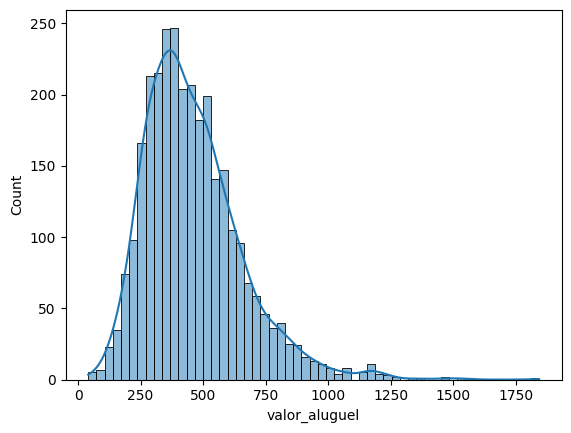

In [10]:
# 📈 Histograma da variável alvo com curva de densidade
sns.histplot(data=df, x="valor_aluguel", kde=True)

In [11]:
# 🔗 Matriz de correlação entre variáveis numéricas
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


### ℹ️ Interpretação do Coeficiente de Correlação

O coeficiente de correlação é uma medida estatística que indica a **força** e a **direção** da relação linear entre duas variáveis numéricas. Os valores possíveis variam entre -1 e 1:

- `+1`: correlação linear **positiva perfeita**  
- `0`: **ausência de correlação linear**  
- `-1`: correlação linear **negativa perfeita**

O coeficiente mais comum é o **de Pearson**, que mede correlação linear. Outros tipos incluem:
- **Spearman**: avalia relações monotônicas (baseado em ranking)
- **Kendall**: avalia concordância entre ordenações

No contexto desta análise, será investigada a relação entre `area_m2` e `valor_aluguel`.


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

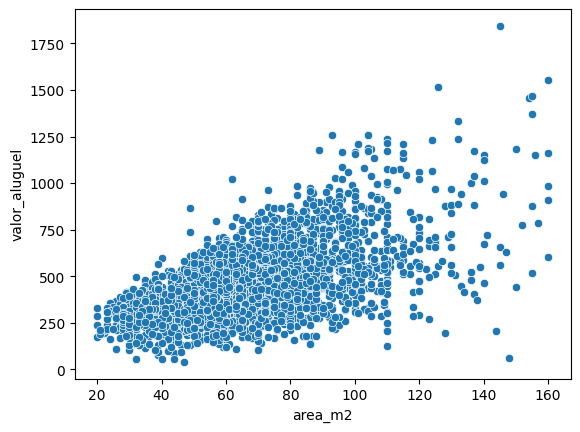

In [12]:
# 🔍 Gráfico de dispersão entre área do imóvel e valor do aluguel
sns.scatterplot(data=df, x="area_m2", y="valor_aluguel")

> A dispersão observada sugere uma tendência de aumento no valor do aluguel com o crescimento da área dos imóveis, ainda que com variação significativa. A análise estatística com `statsmodels` permitirá verificar a força dessa relação.

## 📐 Introdução à Regressão Linear Simples

A regressão linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (ou variável alvo) e uma ou mais variáveis independentes (ou preditoras).

O objetivo é estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

Neste minilab, será utilizada a **Regressão Linear Simples**, que envolve apenas uma variável preditora.

### 📌 Equação da Regressão Linear Simples

\[
Y = a + bX + ε
\]

Onde:
- \( Y \): variável dependente (ex: valor do aluguel)
- \( X \): variável independente (ex: área do imóvel)
- \( a \): intercepto da reta
- \( b \): coeficiente angular (inclinação)
- \( \varepsilon \): erro aleatório (resíduo)

A regressão linear é amplamente utilizada em áreas como economia, ciências sociais, biologia e engenharia, sendo também uma técnica fundamental para análise de dados e aprendizado de máquina.

---

Na próxima etapa, será utilizado o método dos **Mínimos Quadrados Ordinários (OLS)**, através da biblioteca `statsmodels`, para ajustar o modelo e interpretar seus parâmetros estatísticos.


## 🧪 Construção do Modelo de Regressão Linear com `statsmodels`

Nesta etapa, será construído um modelo de regressão linear simples utilizando o método dos **Mínimos Quadrados Ordinários (OLS)** da biblioteca `statsmodels`.

O objetivo é ajustar uma equação linear entre a variável independente (`area_m2`) e a variável dependente (`valor_aluguel`), para avaliar a força e significância dessa relação.

O processo envolve:

1. Definir as variáveis `X` (independente) e `y` (dependente)
2. Adicionar uma constante à variável independente (intercepto)
3. Criar o modelo OLS
4. Ajustar (treinar) o modelo com os dados
5. Exibir o sumário estatístico


In [13]:
# 👀 Visualização inicial dos dados
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [14]:
# 🎯 Definição da variável dependente
y = df['valor_aluguel']

# 🧱 Definição da variável independente
X = df['area_m2']

# ➕ Adição do termo constante (intercepto) ao modelo
X = sm.add_constant(X)

In [15]:
# 📐 Criação do modelo de regressão linear (OLS)
modelo = sm.OLS(y, X)

### ℹ️ Sobre o método `sm.OLS(y, X)`

A função `OLS` (*Ordinary Least Squares*) da biblioteca `statsmodels` é utilizada para ajustar um modelo de regressão linear que minimiza a soma dos erros quadráticos.

- `y`: variável dependente (resposta)
- `X`: variável ou conjunto de variáveis independentes (explicativas)

Essa abordagem permite estimar os coeficientes da equação linear e gerar estatísticas como R², p-valores e intervalo de confiança.


In [16]:
# 🏁 Ajuste (treinamento) do modelo
resultado = modelo.fit()

# 📊 Sumário estatístico do modelo ajustado
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          6.84e-275
Time:                        16:56:39   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

## 🧾 Interpretação Aplicada dos Resultados

Com base no modelo ajustado, é possível extrair algumas interpretações relevantes sobre a relação entre a **área do imóvel (m²)** e o **valor do aluguel (R$)**:

### 📌 Principais Resultados

- **Coeficiente angular (`area_m2`)**: `4.83`
  - A cada aumento de **1 m²** na área do imóvel, o valor do aluguel tende a aumentar, em média, **R$ 4,83**.
  - O valor-p associado ao coeficiente é `0.000`, indicando que a variável `area_m2` é **estatisticamente significativa** no modelo.

- **Intercepto (`const`)**: `133.70`
  - Representa o valor estimado do aluguel quando a área é igual a zero. Apesar de não ter interpretação prática direta, é necessário para definir a equação da reta.

- **Coeficiente de Determinação (R²): `0.342`**
  - O modelo explica aproximadamente **34,2% da variação** no valor do aluguel com base apenas na área do imóvel.
  - Apesar de não ser um valor alto, é razoável para um modelo com apenas uma variável explicativa.

- **Estatística F: `1559`, com p-valor próximo de zero**
  - Indica que o modelo, como um todo, é **estatisticamente significativo**.

---

### 📌 Considerações

- O modelo demonstra que há uma **relação positiva e estatisticamente significativa** entre a área do imóvel e o valor do aluguel.
- Ainda assim, como o R² não é elevado, **outras variáveis podem estar influenciando o valor do aluguel** (como localização, número de quartos, vagas, etc.).
- Este modelo serve como uma **base simples e interpretável**, mas pode ser estendido com múltiplas variáveis para melhorar o poder explicativo.



## 📉 Visualização do Modelo Ajustado

A seguir, é apresentada a reta de regressão ajustada sobre os dados reais, permitindo observar visualmente a relação entre a área do imóvel e o valor do aluguel.


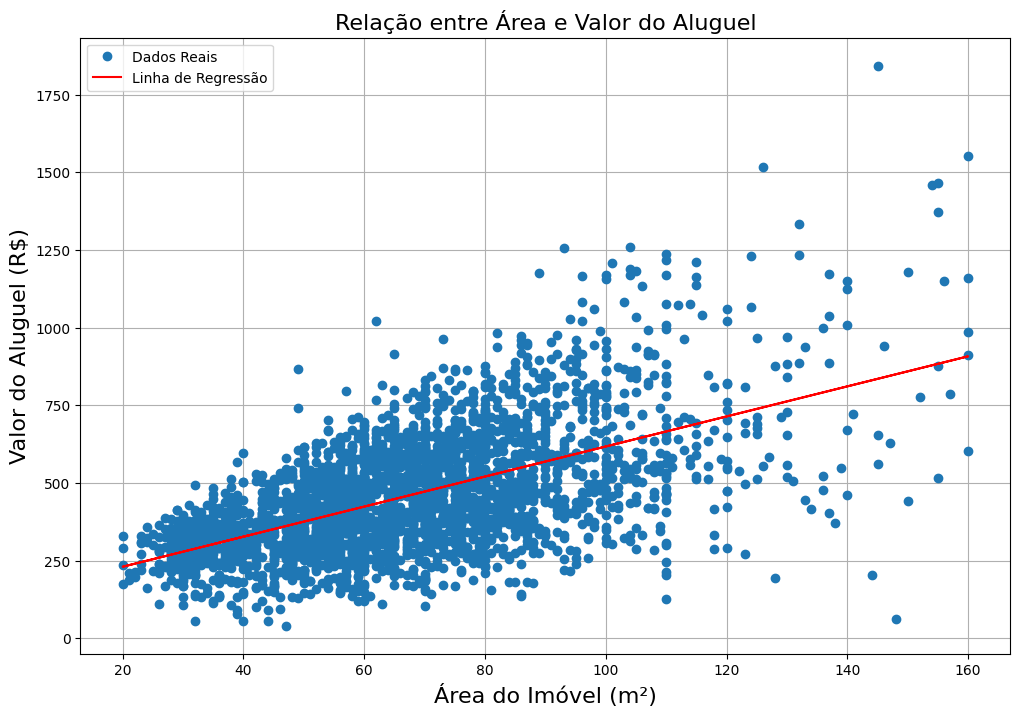

In [17]:
# 📈 Plot da regressão linear sobre os dados reais
plt.figure(figsize=(12, 8))
plt.xlabel("Área do Imóvel (m²)", size=16)
plt.ylabel("Valor do Aluguel (R$)", size=16)

# 🔹 Dados reais (dispersão)
plt.plot(X["area_m2"], y, "o", label="Dados Reais")

# 🔺 Linha de regressão (valores ajustados pelo modelo)
plt.plot(X["area_m2"], resultado.fittedvalues, "r-", label="Linha de Regressão")

plt.legend(loc="best")
plt.title("Relação entre Área e Valor do Aluguel", size=16)
plt.grid(True)
plt.show()


## ✅ Conclusão

A análise demonstrou uma **relação linear positiva** entre a área dos imóveis (em m²) e o valor do aluguel. No entanto, a área por si só **não é suficiente** para explicar completamente a variação nos valores, conforme indicado pelo coeficiente de determinação **R² = 0.34**.

Isso significa que **aproximadamente 34% da variação** no valor do aluguel pode ser explicada pela área do imóvel. Os demais 66% podem estar associados a outras variáveis presentes no dataset, como:

- **Idade do imóvel** (ano de construção)
- **Número de banheiros**
- **Número de cozinhas**
- **Localização**, representada pelos códigos de bairro e código de localização

Além disso, vale ressaltar que:

- **Correlação não implica causalidade**: a relação observada não garante que o aumento na área *cause* o aumento no aluguel.
- A avaliação de causalidade exige técnicas específicas, como **modelos de análise causal**, **experimentos controlados** ou **modelagem com variáveis instrumentais**.

Este modelo serve como uma base introdutória para modelagens mais robustas, que podem incorporar múltiplas variáveis explicativas e métodos de validação mais sofisticados.

## 🧾 Versões dos Pacotes Utilizados

Este notebook foi executado com as seguintes versões de bibliotecas Python:

In [18]:
# 📦 Versões dos pacotes usados neste Lab
%reload_ext watermark
%watermark -a "Small Data Lab" --python --iversions

Author: Small Data Lab

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.37.0

matplotlib : 3.10.3
pandas     : 2.3.0
seaborn    : 0.13.2
statsmodels: 0.14.4

